What is pandas

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

from pylab import *

Series

count    1000.000000
mean       -0.022808
std         1.215015
min        -4.126453
25%        -0.836690
50%         0.014717
75%         0.860319
max         3.673552
dtype: float64


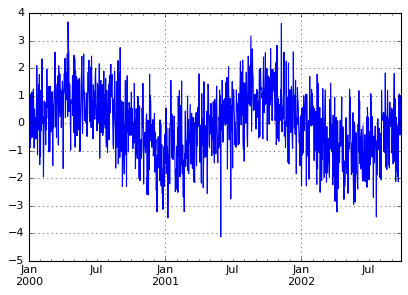

In [2]:
s = pd.Series(np.random.randn(1000)+np.sin(np.arange(0,2,2e-3)*2*pi), index=pd.date_range('1/1/2000', periods=1000))
s.plot()
print s.describe()

We can use the series object to do quick time-domain analyses, similar to what we can do with matplotlib but handled internally and self-consistently

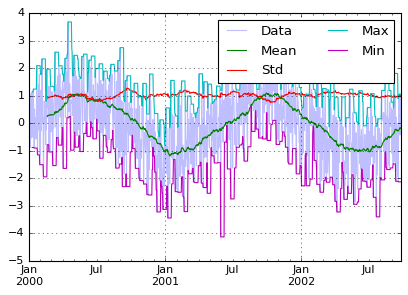

In [3]:
s.plot(alpha=0.25,label='Data')
r=pd.rolling_mean(s,50)
v=pd.rolling_std(s,50)
ma=pd.rolling_max(s,10)
mi=pd.rolling_min(s,10)
r.plot(label='Mean')
v.plot(label='Std')
ma.plot(label='Max')
mi.plot(label='Min')
legend(ncol=2)
show()

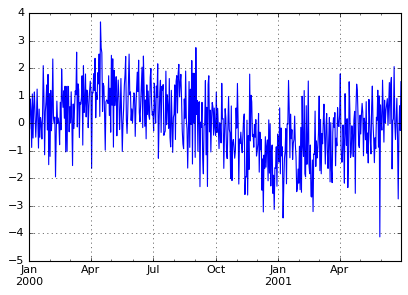

In [4]:
sy=s['2000-01':'2001-06']
sy.plot()

Int64Index([0, 10, 11, 12, 42, 60], dtype='int64')
Int64Index([0, 10, 11, 12, 42, 60, 1, -5], dtype='int64')
Int64Index([-5, 0, 1, 10, 11, 12, 42, 60], dtype='int64')
-5     20
 0      1
 1      0
 10     2
 11     3
 12     4
 42     5
 60     6
dtype: int64


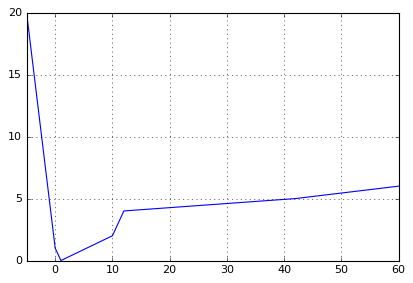

In [5]:
sIrr = pd.Series([1,2,3,4,5,6],index=[0,10,11,12,42,60])
print sIrr.index

sIrr[1]=0
sIrr[-5]=20
print sIrr.index

sIrrSorted=sIrr.sort_index()
print sIrrSorted.index
print sIrrSorted

sIrrSorted.plot()
show()

DataFrame

                   A         B
2010-01-01  0.586282  0.459236
2010-01-02 -0.007036  1.797509
2010-01-03 -1.008170  0.684361
2010-01-04  0.839448 -0.407912
2010-01-05 -0.861735 -0.830696
                   A         B
2010-01-09  0.558838 -0.665839
2010-01-10 -0.453822 -0.647519
0.558837583396


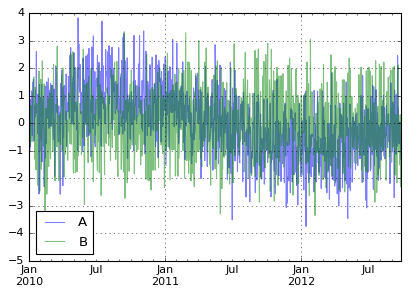

In [19]:
sA = pd.Series(np.random.randn(1000)+np.sin(np.arange(0,2,2e-3)*0.5*2*pi), index=pd.date_range('1/1/2010', periods=1000))
sB = pd.Series(np.random.randn(1000)+np.sin(np.arange(0,2,2e-3)*100*2*pi), index=pd.date_range('1/1/2010', periods=1000))

d = pd.DataFrame({'A':sA,'B':sB})
print d.head()

print d['20100109':'20100110']

print d.A['20100109']

d.plot(alpha=0.5)
show()

In [21]:
sANew = pd.Series(np.random.randn(3000)+np.sin(np.arange(0,6,2e-3)*0.5*2*pi), index=pd.date_range('1/1/2015', periods=3000))
sBNew = pd.Series(np.random.randn(3000)+np.sin(np.arange(0,6,2e-3)*50*2*pi), index=pd.date_range('1/1/2015', periods=3000))
sCNew = pd.Series(np.random.randn(3000) > 0.5, index=pd.date_range('1/1/2015', periods=3000))

dNew = pd.DataFrame({'A':sANew,'B':sBNew,'C':sCNew})

dNew.head()

,A,B,C
2015-01-01,1.688134,0.060195,False
2015-01-02,-1.708919,1.328165,False
2015-01-03,1.715135,1.292734,False
2015-01-04,0.498537,1.832676,True
2015-01-05,-1.784548,0.243704,False


                   A         B    C
2010-01-01  0.586282  0.459236  NaN
2010-01-02 -0.007036  1.797509  NaN
2010-01-03 -1.008170  0.684361  NaN
2010-01-04  0.839448 -0.407912  NaN
2010-01-05 -0.861735 -0.830696  NaN
                   A         B      C
2015-01-01  1.688134  0.060195  False
2015-01-02 -1.708919  1.328165  False
2015-01-03  1.715135  1.292734  False
2015-01-04  0.498537  1.832676   True
2015-01-05 -1.784548  0.243704  False
4000 3000 926
                   A         B
2010-01-01  0.586282  0.459236
2010-01-02 -0.007036  1.797509
2010-01-03 -1.008170  0.684361
2010-01-04  0.839448 -0.407912
2010-01-05 -0.861735 -0.830696


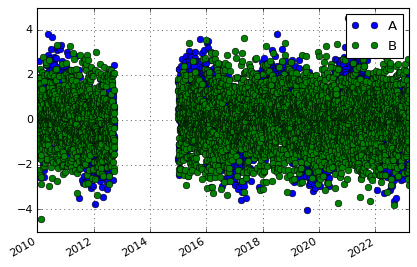

In [22]:
dTot=pd.concat([d,dNew])
print dTot.head()

dValid=dTot.dropna(axis=0)
print dValid.head()

print len(dTot),len(dValid),len(dTot[dTot.C == True])

dClean=dTot.dropna(axis=1)
print dClean.head()

dTot.plot(marker='o',linestyle='')
show()

In [23]:
#create fake data
def signal(x,tau1,tau2,x0=500):
    dx=x-x0
    y=exp(-dx/tau1)/tau1-exp(-dx/tau2)/tau2
    y[dx<0]=0.0
    return y
 
def noisySignal(x,tau1,tau2,rms,x0=500):
    noise=np.random.normal(size=len(x),scale=rms)
    return signal(x,tau1,tau2,x0=x0)*2.0+noise
 
def noisyPileup(x,tau1,tau2,rms,nEvents,bad=False):
   
    noise=np.random.normal(size=len(x),scale=rms)
    x0=np.random.rand()*max(x)
    sig=signal(x,tau1,tau2,x0=x0)
   
    for i in range (1,nEvents):
        if(bad):
            x0+=50
        else:
            x0=np.random.rand()*max(x)
        amp=np.random.rand()*10
        sig+=signal(x,tau1,tau2,x0=x0)*amp
       
    sig+=noise
 
    return sig

cA=list()
cB=list()
truth=list()

x=np.arange(0,2000)

for i in range(0,1000):
    
    bad=np.random.rand()>0.1

    if(bad):
        chanA=np.random.rand()>0.5
        nEvents=(6-np.ceil(5*np.sqrt(np.random.uniform()))).astype(np.int)
        
        pileup=noisyPileup(x,1000,10,0.01,nEvents)
        noise=np.random.normal(size=len(x),scale=0.01)
        
        if(chanA):
            cA.append(pd.Series(pileup,index=x))
            cB.append(pd.Series(noise,index=x))
        else:
            cA.append(pd.Series(noise,index=x))
            cB.append(pd.Series(pileup,index=x))
    else:
        cA.append(pd.Series(noisySignal(x,1000,10,0.01),index=x))
        cB.append(pd.Series(noisySignal(x,1000,10,0.01),index=x))
    truth.append(not bad)
    
data=pd.DataFrame({'A':cA,'B':cB,'GoodEvent':truth})

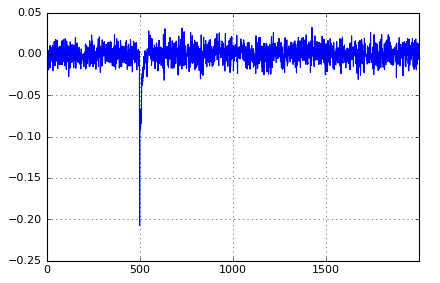

In [10]:
data['A'][0].plot()

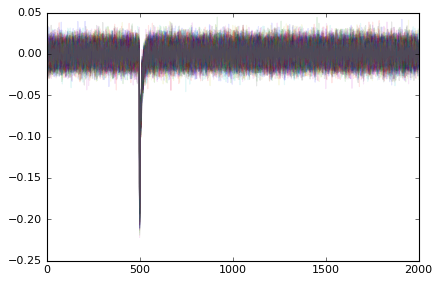

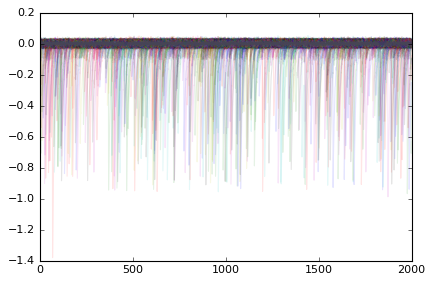

In [11]:
data.head()

data[data.GoodEvent == True]['A'].apply(plot,alpha=0.1)
show()

data[data.GoodEvent == False]['A'].apply(plot,alpha=0.1)
show()

,A,B,GoodEvent,Max_A,Min_A,Range_A,Max_B,Min_B,Range_B
0,0 0.009678 1 0.021331 2 -0.00...,0 0.019266 1 -0.000507 2 0.01...,True,0.031925,-0.207222,0.239147,0.034373,-0.206687,0.241060
1,0 0.009242 1 -0.006582 2 -0.00...,0 -0.008499 1 0.015567 2 0.00...,False,0.039950,-0.700918,0.740868,0.034749,-0.031647,0.066396
2,0 -0.010894 1 0.009837 2 0.00...,0 -0.006932 1 0.009276 2 -0.00...,False,0.035578,-0.087913,0.123492,0.033179,-0.033866,0.067045
3,0 0.004334 1 -0.000254 2 -0.01...,0 0.008489 1 0.004731 2 0.01...,False,0.034509,-0.273601,0.308110,0.041853,-0.032857,0.074710
4,0 0.015005 1 -0.016870 2 0.00...,0 -0.008059 1 -0.000885 2 -0.01...,False,0.043989,-0.085560,0.129549,0.035913,-0.037395,0.073308


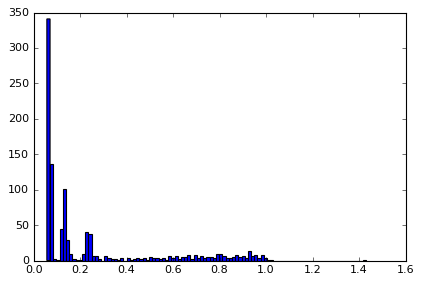

In [12]:
for chan in ['A','B']:
    data['Max_'+chan]=data[chan].map(np.max)
    data['Min_'+chan]=data[chan].map(np.min)
    data['Range_'+chan]=data['Max_'+chan]-data['Min_'+chan]

hist(data['Range_A'],bins=100)

data.head()

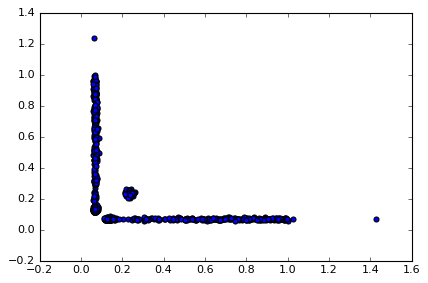

In [13]:
scatter(data['Range_A'],data['Range_B'])

,A,B,GoodEvent,Max_A,Min_A,Range_A,Max_B,Min_B,Range_B
0,0 0.009678 1 0.021331 2 -0.00...,0 0.019266 1 -0.000507 2 0.01...,True,0.031925,-0.207222,0.239147,0.034373,-0.206687,0.241060
12,0 0.011426 1 -0.002459 2 0.00...,0 0.003989 1 0.001731 2 -0.01...,True,0.037103,-0.204007,0.241109,0.034298,-0.212264,0.246562
18,0 -0.005759 1 0.003743 2 -0.00...,0 -0.003027 1 0.001178 2 0.01...,True,0.032437,-0.192119,0.224556,0.037983,-0.195093,0.233076
27,0 -0.013131 1 0.009496 2 0.00...,0 0.009109 1 0.000724 2 -0.00...,True,0.029873,-0.183063,0.212936,0.035426,-0.199877,0.235302
28,0 0.019233 1 -0.003708 2 -0.00...,0 -0.006576 1 -0.015082 2 -0.00...,True,0.033588,-0.221977,0.255565,0.033073,-0.201457,0.234530


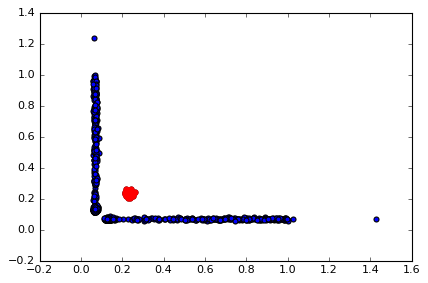

In [14]:
dataGood=data[(data['Range_A']>0.1) & (data['Range_B']>0.1)]

scatter(data['Range_A'],data['Range_B'])
scatter(dataGood['Range_A'],dataGood['Range_B'],color='red')

dataGood.head()

MultiIndex

For example, we can build an array with a multi-index to include column categories with variables grouped by detector

In [15]:
data=pd.DataFrame({('A','trace'):cA,('B','trace'):cB,('Event','GoodEvent'):truth})
for chan in ['A','B']:
    data[chan,'Max']=data[chan]['trace'].map(np.max)
    data[chan,'Min']=data[chan]['trace'].map(np.min)
    data[chan,'Range']=data[chan,'Max']-data[chan,'Min']

data.head()

A  \
                                               trace   
0  0       0.009678
1       0.021331
2      -0.00...   
1  0       0.009242
1      -0.006582
2      -0.00...   
2  0      -0.010894
1       0.009837
2       0.00...   
3  0       0.004334
1      -0.000254
2      -0.01...   
4  0       0.015005
1      -0.016870
2       0.00...   

                                                   B     Event         A  \
                                               trace GoodEvent       Max   
0  0       0.019266
1      -0.000507
2       0.01...      True  0.031925   
1  0      -0.008499
1       0.015567
2       0.00...     False  0.039950   
2  0      -0.006932
1       0.009276
2      -0.00...     False  0.035578   
3  0       0.008489
1       0.004731
2       0.01...     False  0.034509   
4  0      -0.008059
1      -0.000885
2      -0.01...     False  0.043989   

                              B                      
        Min     Range       Max       Min     Range  
0 -0.207222  0.239147  0.034373 -0.206687  0.241060  
1 -0.700918  0.740868  0.034749 -0.031647  0.066396  
2 -0.087913  0.123492  0.033179 -0.033866  0.067045  
3 -0.273601  0.308110  0.041853 -0.032857  0.074710  
4 -0.085560  0.129549  0.035913 -0.037395  0.073308

In [16]:
data=data.sortlevel(axis=1)
data.head()

A                      \
                                               trace       Max       Min   
0  0       0.009678
1       0.021331
2      -0.00...  0.031925 -0.207222   
1  0       0.009242
1      -0.006582
2      -0.00...  0.039950 -0.700918   
2  0      -0.010894
1       0.009837
2       0.00...  0.035578 -0.087913   
3  0       0.004334
1      -0.000254
2      -0.01...  0.034509 -0.273601   
4  0       0.015005
1      -0.016870
2       0.00...  0.043989 -0.085560   

                                                             B            \
      Range                                              trace       Max   
0  0.239147  0       0.019266
1      -0.000507
2       0.01...  0.034373   
1  0.740868  0      -0.008499
1       0.015567
2       0.00...  0.034749   
2  0.123492  0      -0.006932
1       0.009276
2      -0.00...  0.033179   
3  0.308110  0       0.008489
1       0.004731
2       0.01...  0.041853   
4  0.129549  0      -0.008059
1      -0.000885
2      -0.01...  0.035913   

                          Event  
        Min     Range GoodEvent  
0 -0.206687  0.241060      True  
1 -0.031647  0.066396     False  
2 -0.033866  0.067045     False  
3 -0.032857  0.074710     False  
4 -0.037395  0.073308     False

Panel

Pandas IO